In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [178]:
data = pd.read_csv('train_0OECtn8.csv')

In [179]:
data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [180]:
data.shape

(89197, 10)

In [181]:
data.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [182]:
data.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [183]:
for cols in data:
    print(f'{cols}:{data[cols].unique()}')

row_id:[    1     2     3 ... 89195 89196 89197]
user_id:[19990  5304  1840 ... 27378 24273 11279]
category_id:[37 32 12 23 25  7  8  3  5 28 20 36 24 30 31  4  1 21 10 16 11 19 39 15
 43 26 34 13 42 18 44 45 29 27  9 17 40 14 38  6 35 41 46 22 33  2 47]
video_id:[128 132  24 112 139  14 100   4 161  88  75  72  48 107 103  60  74  83
  87  16 151  99  15 102 129 119  13  51  38  35  22  76  45 116 109 146
   1  67  32  53 148 140  63 115 108 113  92  33 117 114  50  17   6 120
  49  20 136  86  58 165  59  97  46  62 104  26  71  29 123 167 163 125
 145  81  65 162  18  77  36  25   9 124  98  31  94  10  95 156  68  23
 135 105 133 111   8  37  34  11 168  41 142 157 138 149  96 150  30 134
  42  28  66  56 143 106  27 141  40  82  64   7 174 101 121 126  12 158
 144 131 147 137  61 164  84 155 172 171  44 122  43  19  47 110  69 173
 130   5 127  39  52  79 152   2 170  89  70 153 160  91  93  90 154  80
 159 169  54   3  55  21  78 118 175  57  85  73 166]
age:[24 14 19 27 35 23 18

In [184]:
data.drop(['user_id','row_id'],axis=1,inplace=True)

In [185]:
data.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13


In [186]:
def dist(df,col):
    i=1
    plt.figure(figsize=(10,10),dpi=150)
    for key, subdf in df.groupby(col):
        u = df[col].nunique()
        plt.subplot(u,1,i)
        sns.kdeplot(subdf['engagement_score'],shade=True)
        m = np.mean(subdf['engagement_score'])
        s = np.std(subdf['engagement_score'])
        med = np.median(subdf['engagement_score'])
        plt.xlabel('Engagement Score')
        plt.ylabel('Density')
        plt.title(key + '\n  mean:{} std:{} median:{}'.format(round(m,2),round(s,2),round(med,2)))
        plt.tight_layout()
        i=i+1

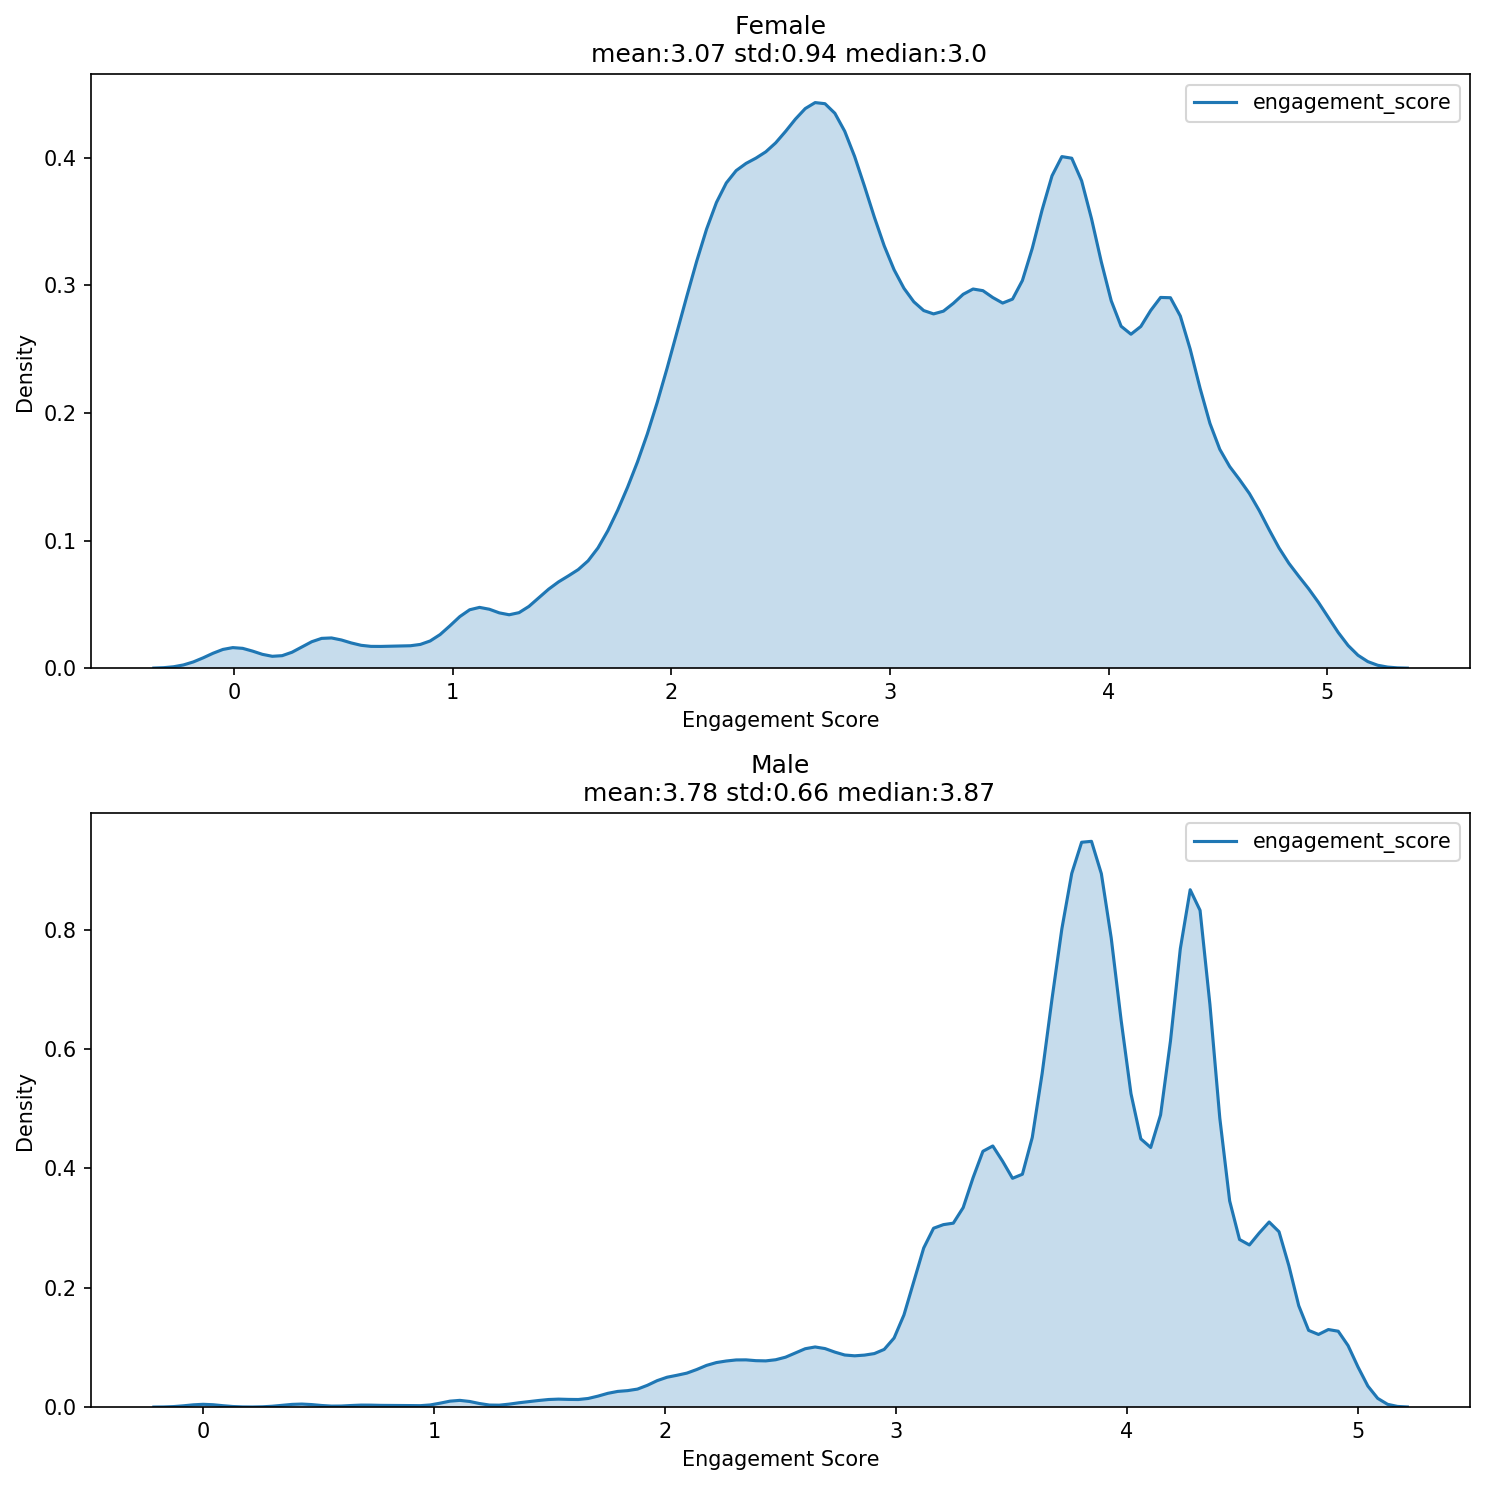

In [187]:
dist(data,'gender')

In [188]:
data['category_id'] = data['category_id'].astype('category')
cat_stat = data['category_id'].value_counts()
cat_stats_less_than_1000 = cat_stat[cat_stat<1000]
cat_stats_less_than_1000

35    986
37    962
29    916
20    702
30    548
41    545
14    536
38    534
24    524
33    517
40    458
22    366
46    236
45    227
44    214
2     167
47     47
Name: category_id, dtype: int64

In [189]:
data['category_id'] = data['category_id'].apply(lambda x: 'others' if x in cat_stats_less_than_1000 else x)

In [190]:
data['category_id'].value_counts()

others    8485
5         8104
8         6313
25        4880
19        4679
21        4043
12        3889
11        3766
4         3678
34        3297
16        3264
13        2777
32        2712
23        2671
18        2241
42        2178
15        2164
9         1886
7         1885
31        1855
3         1845
1         1810
6         1399
39        1339
28        1309
10        1217
17        1208
26        1156
27        1103
36        1025
43        1019
Name: category_id, dtype: int64

In [191]:
data['age_category'] = pd.cut(x=data['age'],bins=[1,18,35,55,70],labels=['child','adult','mid_age','senior'])

In [192]:
data.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_category
0,others,128,24,Male,Student,180,1000,4.33,adult
1,32,132,14,Female,Student,330,714,1.79,child
2,12,24,19,Male,Student,180,138,4.35,adult
3,23,112,19,Male,Student,220,613,3.77,adult
4,23,112,27,Male,Working Professional,220,613,3.13,adult


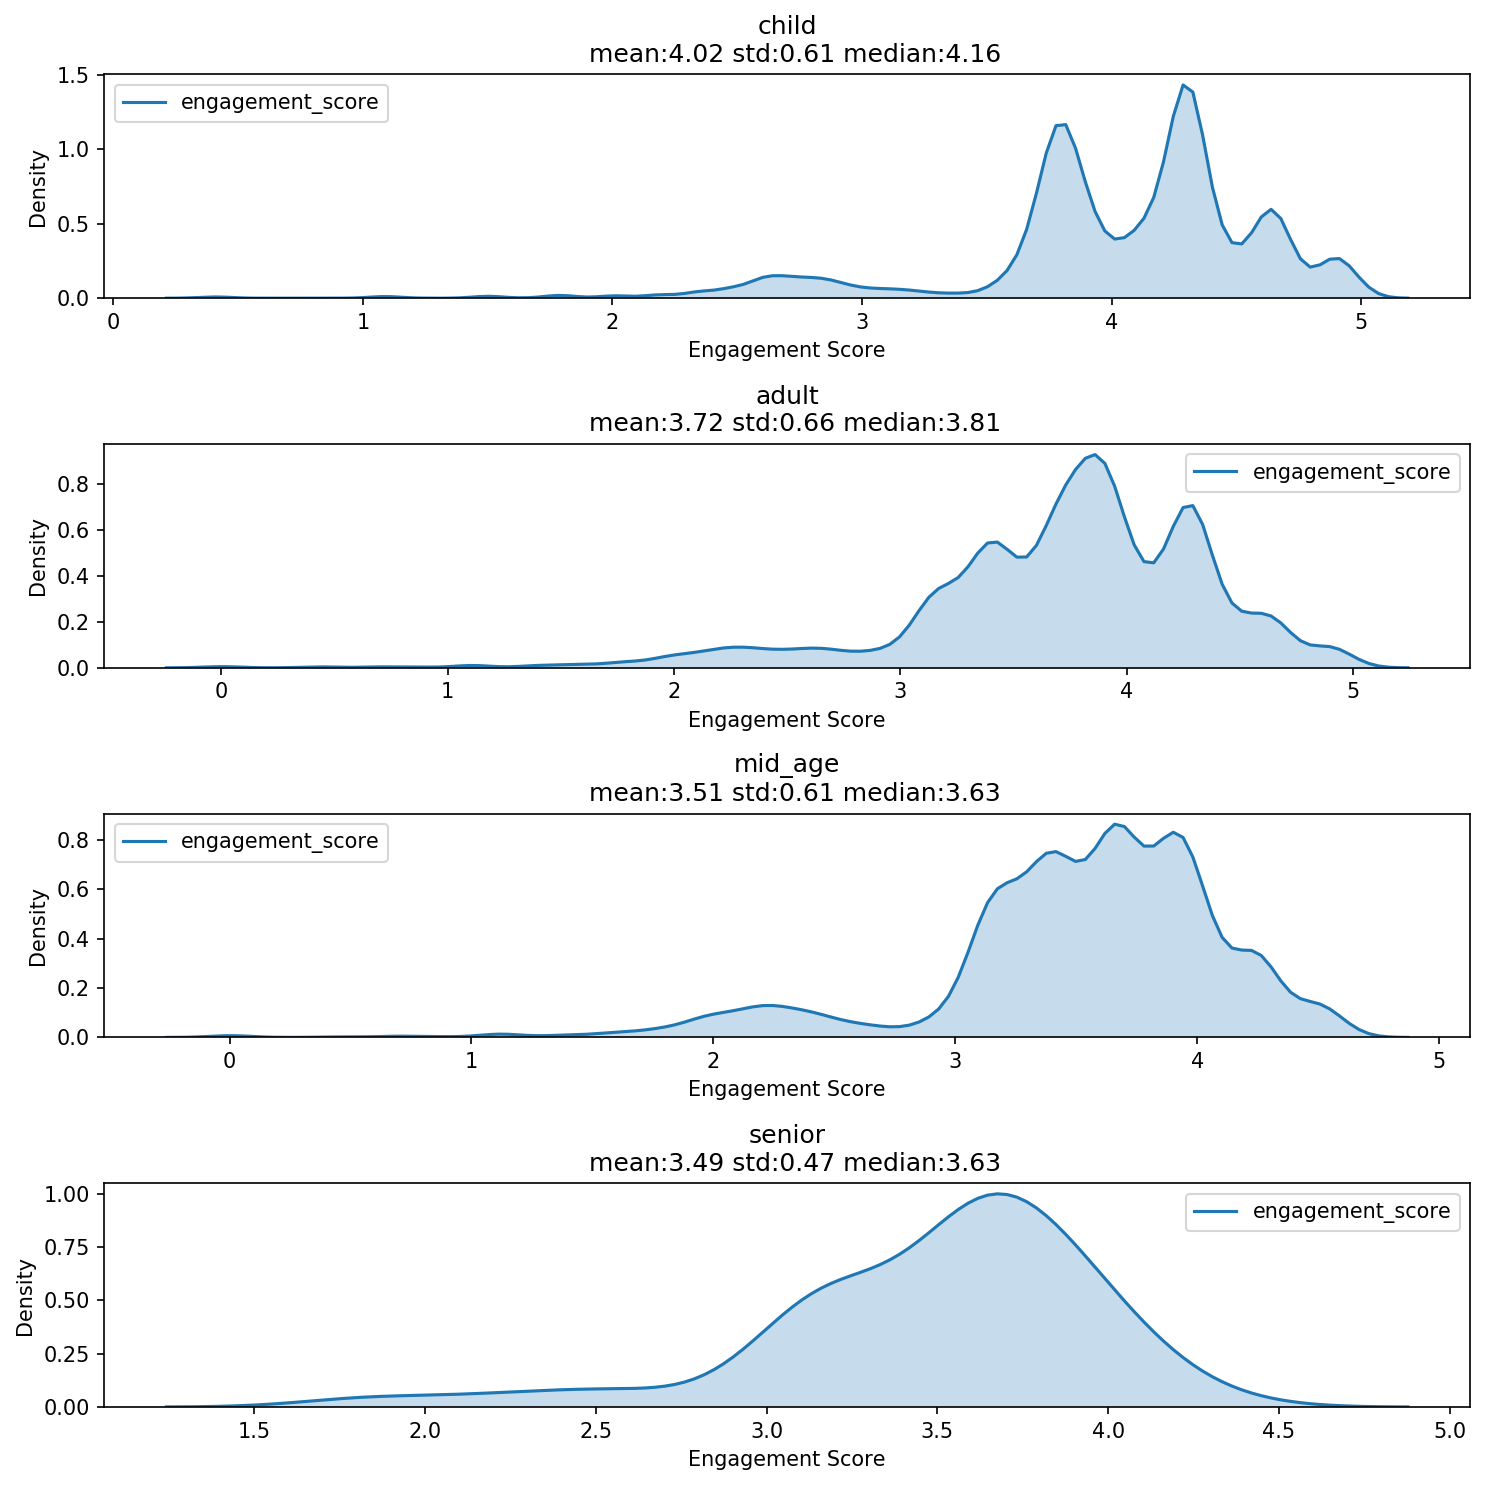

In [193]:
dist(data[data['gender']=='Male'],'age_category')

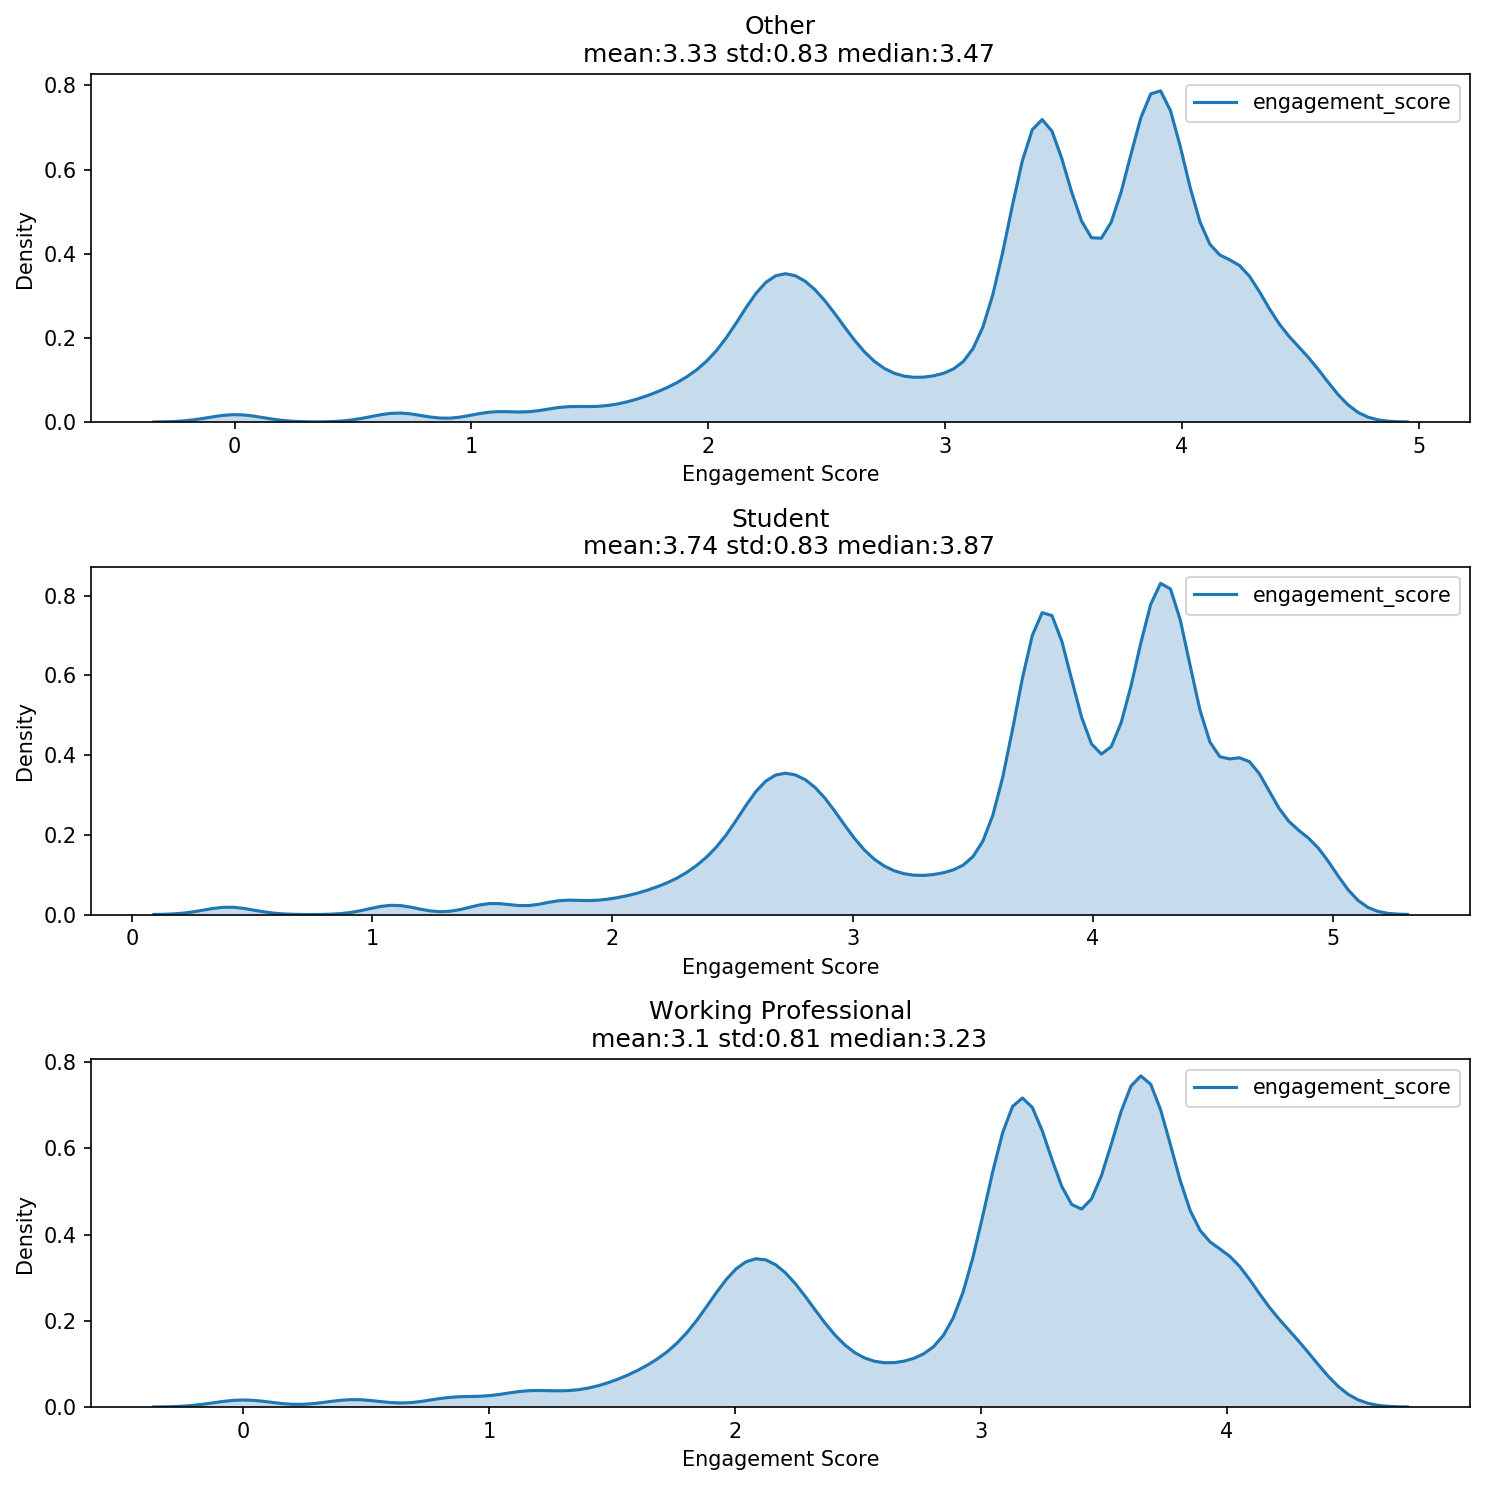

In [194]:
dist(data,'profession')

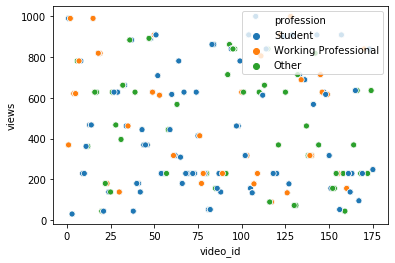

In [195]:
sns.scatterplot(x='video_id',y='views',data=data,hue='profession')

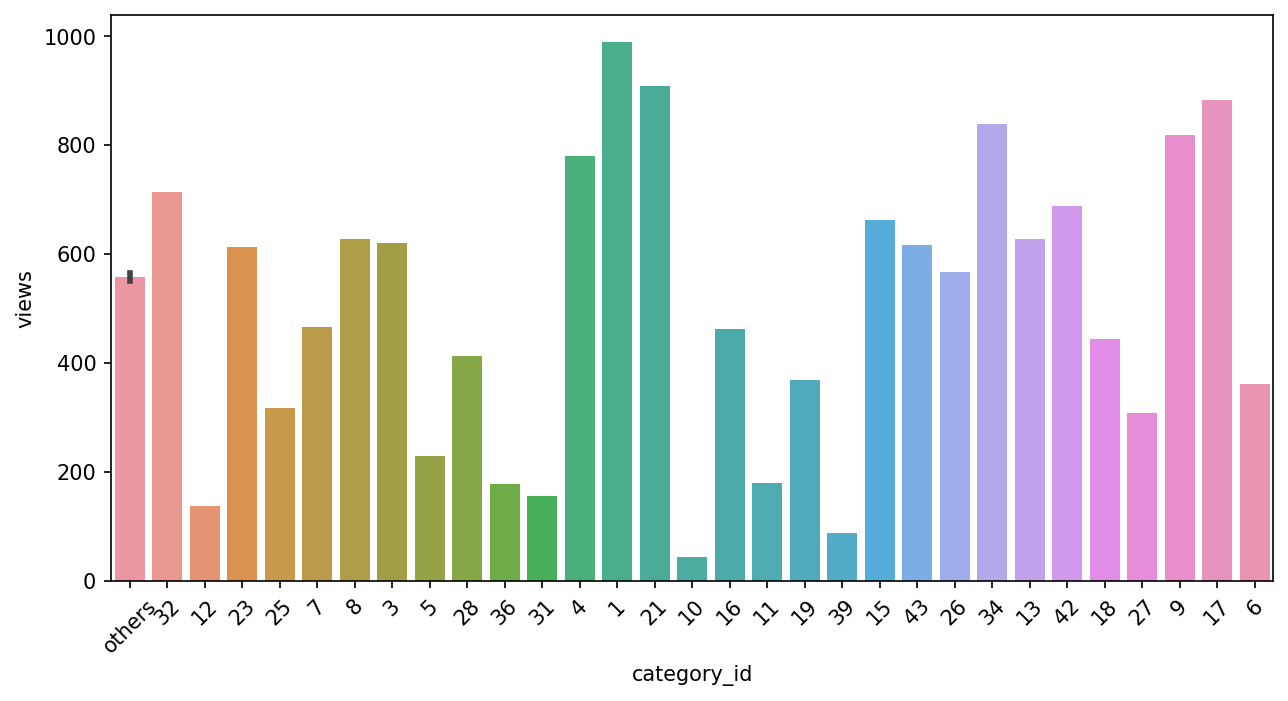

In [196]:
plt.figure(figsize=(10,5),dpi=150)
sns.barplot(x='category_id',y='views',data=data)
plt.xticks(rotation=45);

In [197]:
data[data['category_id']==21]

,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_category
26,21,129,13,Male,Student,320,909,4.01,child
31,21,51,25,Male,Working Professional,320,909,3.63,adult
56,21,50,24,Female,Other,320,909,1.95,adult
65,21,50,15,Female,Student,320,909,3.11,child
79,21,104,25,Female,Student,320,909,2.60,adult
...,...,...,...,...,...,...,...,...,...
89086,21,123,33,Female,Other,320,909,2.71,adult
89099,21,157,34,Male,Working Professional,320,909,3.65,adult
89105,21,157,20,Male,Student,320,909,4.46,adult
89115,21,122,42,Male,Working Professional,320,909,3.16,mid_age


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


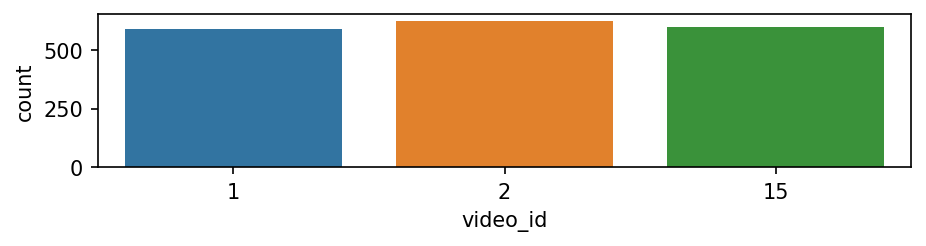

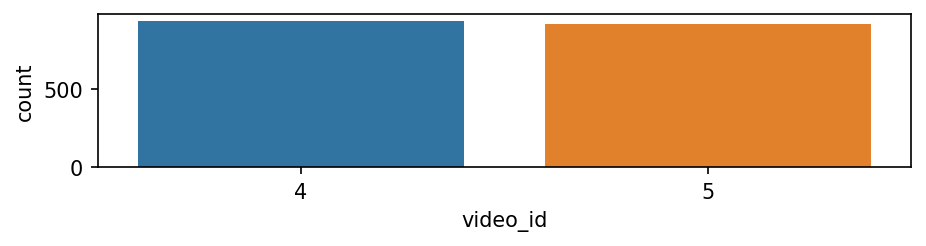

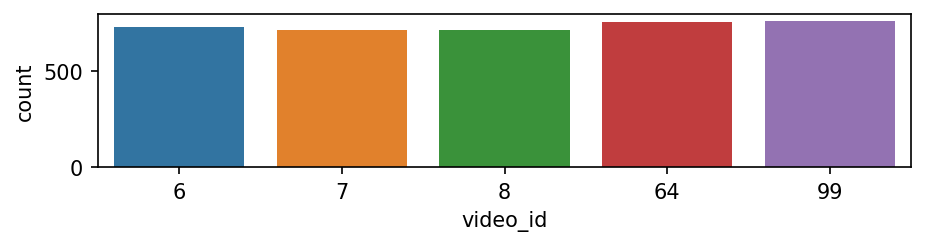

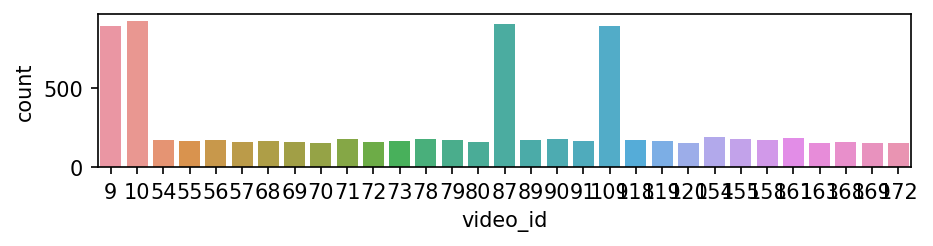

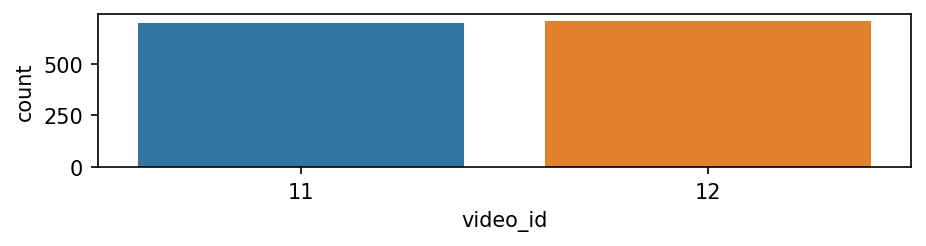

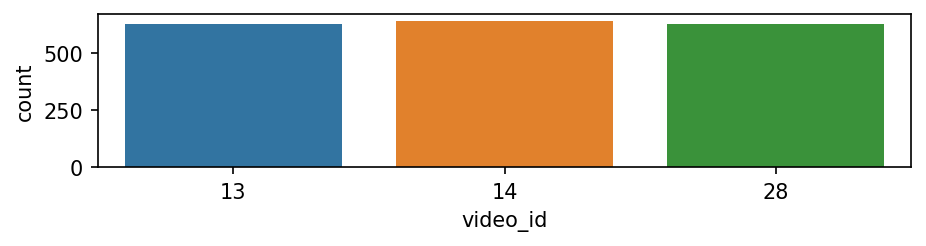

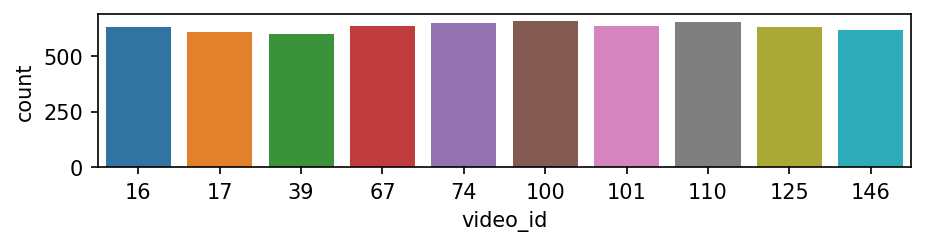

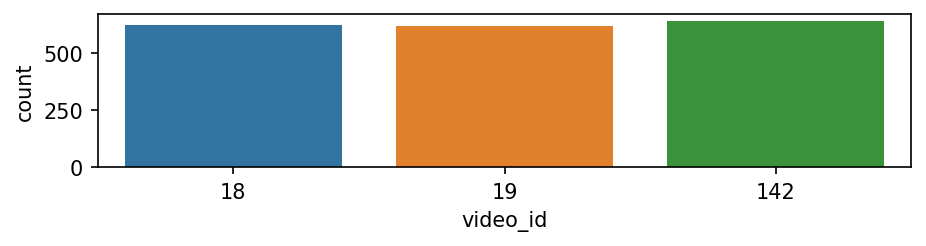

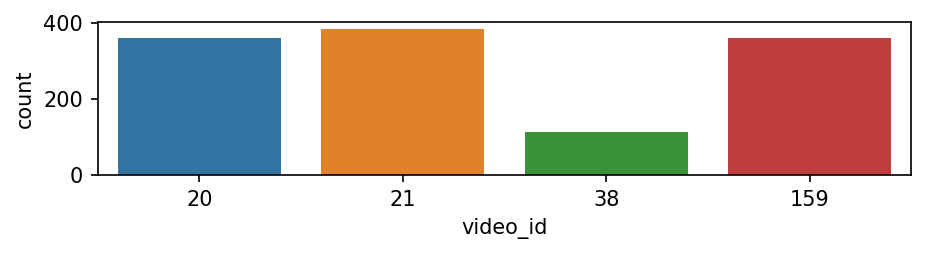

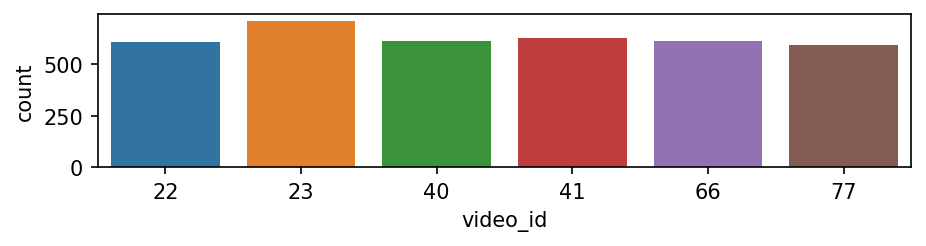

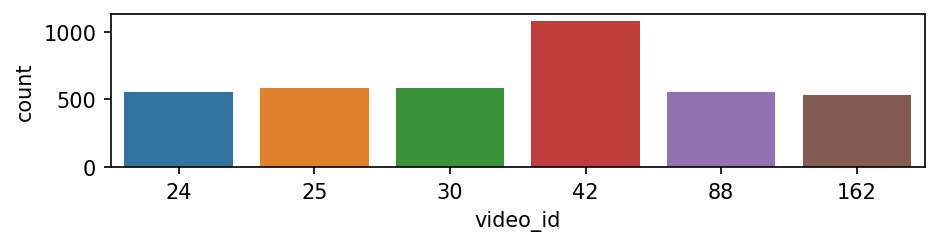

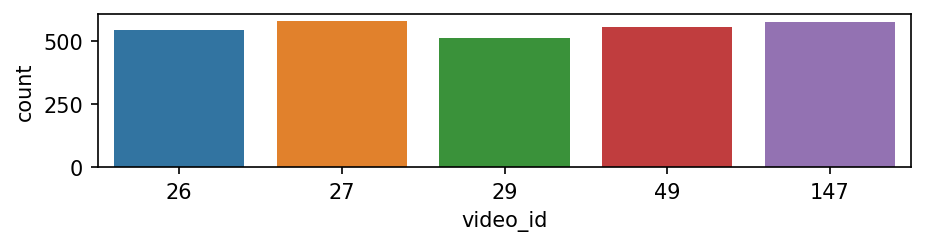

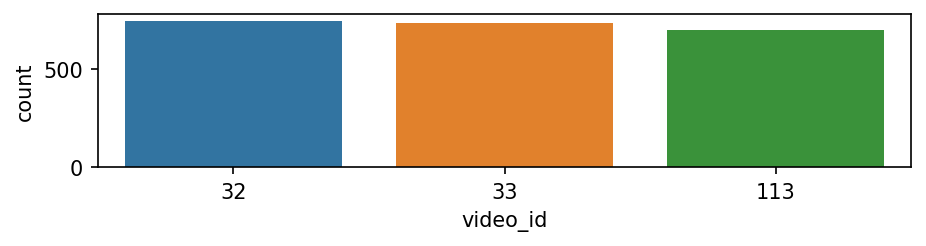

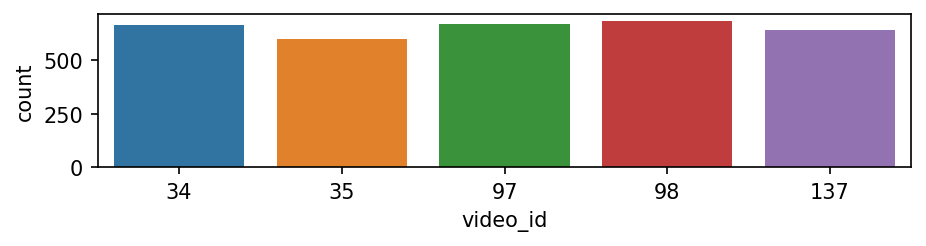

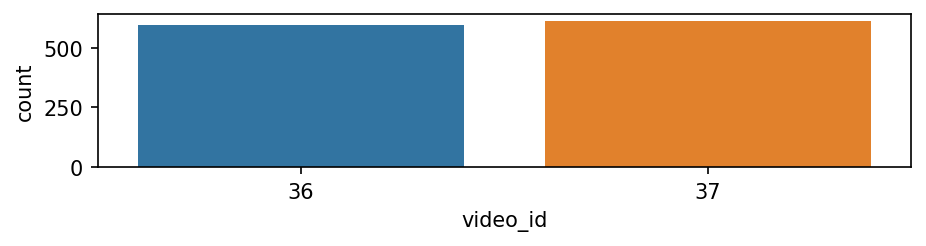

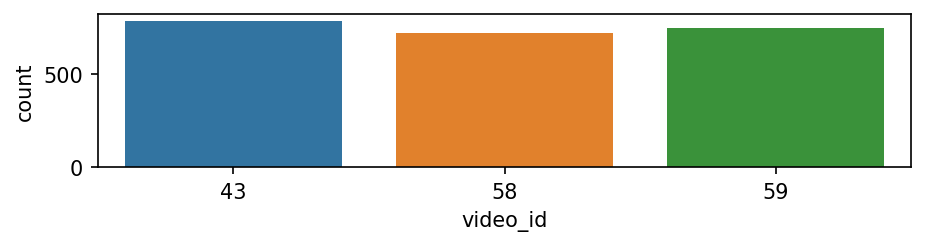

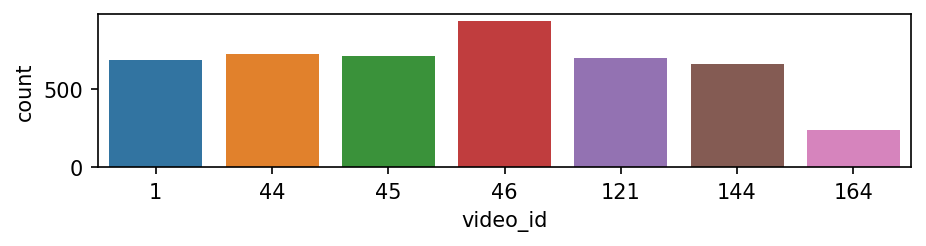

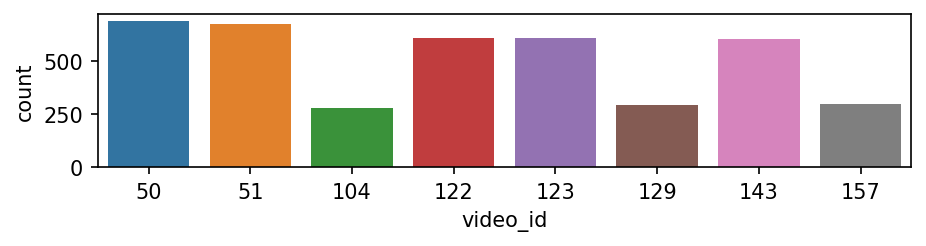

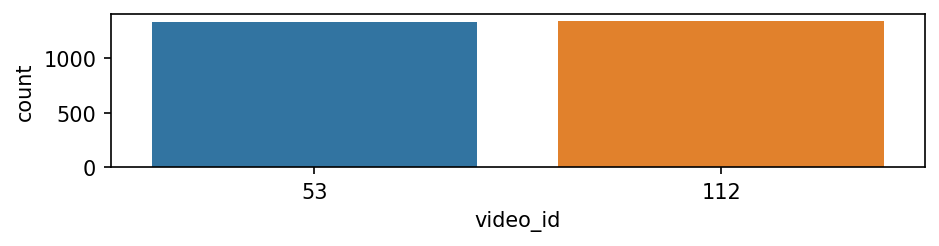

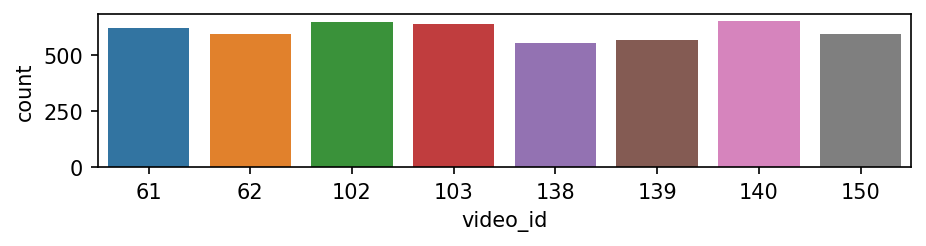

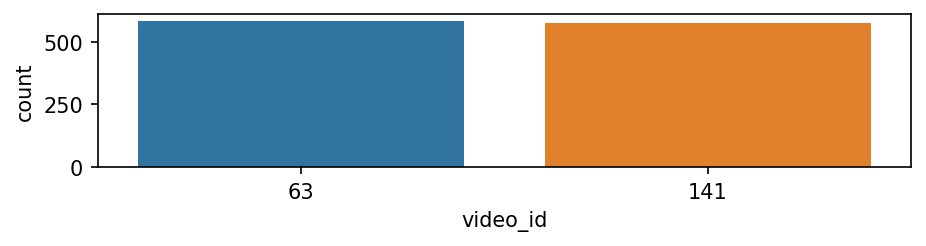

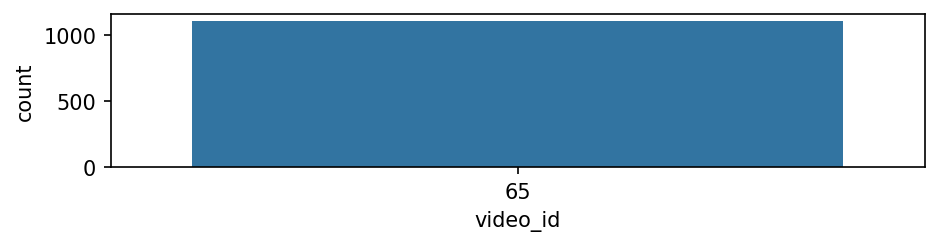

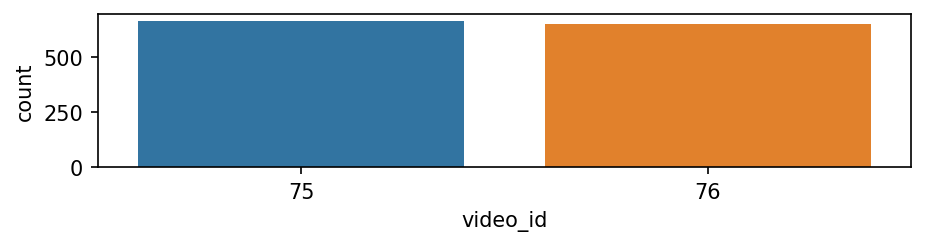

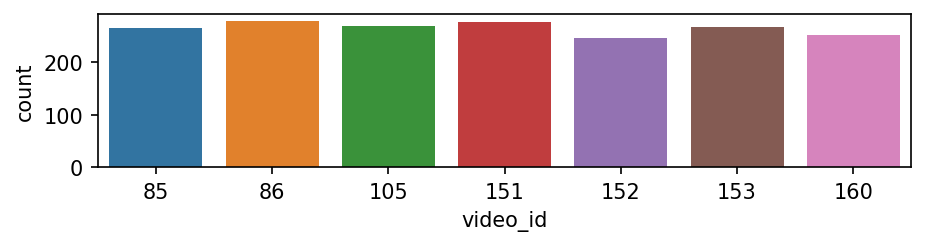

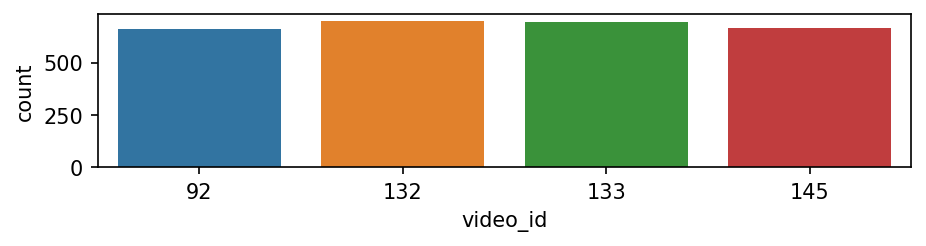

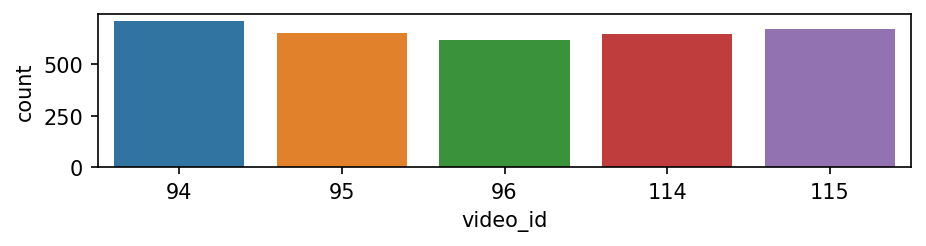

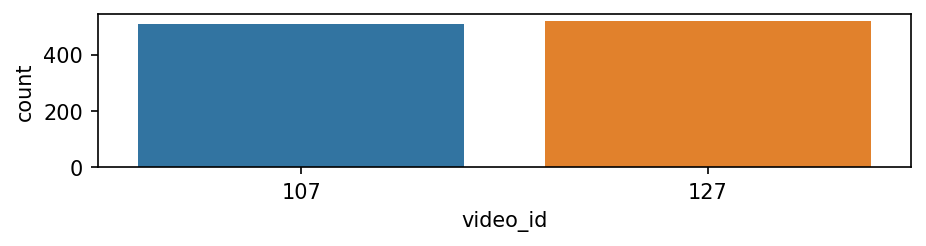

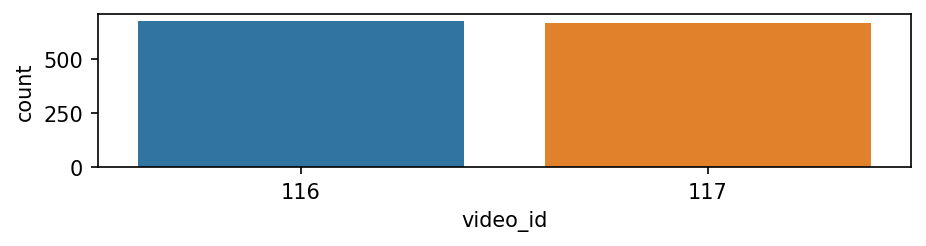

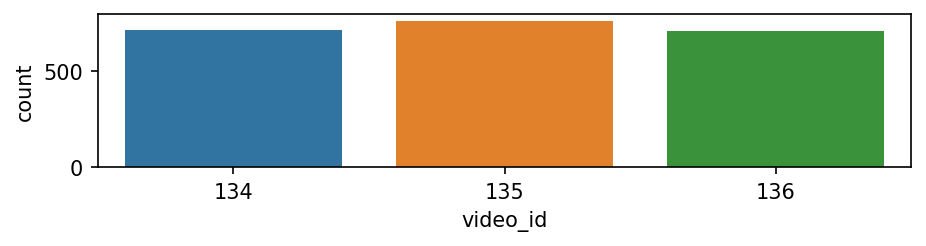

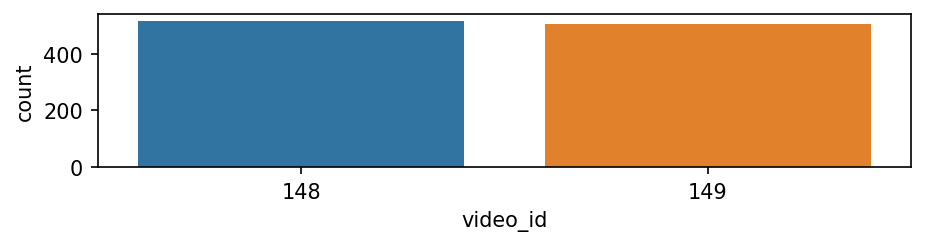

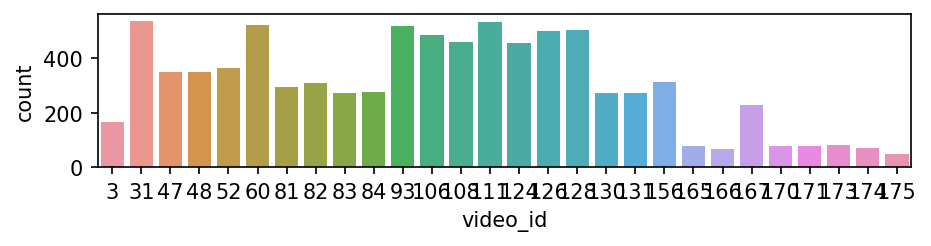

In [198]:
i=1
for keys, df in data.groupby('category_id'):
    plt.figure(figsize=(7,50),dpi=150)
    u = data['category_id'].nunique()
    plt.subplot(u,1,i)
    sns.countplot(df['video_id'])

In [199]:
def dist_1(df,col):
    i=1
    plt.figure(figsize=(10,50),dpi=150)
    for key, subdf in df.groupby(col):
        u = df[col].nunique()
        plt.subplot(u,1,i)
        sns.kdeplot(subdf['engagement_score'],shade=True)
        m = np.mean(subdf['engagement_score'])
        s = np.std(subdf['engagement_score'])
        med = np.median(subdf['engagement_score'])
        plt.xlabel('Engagement Score')
        plt.ylabel('Density')
        plt.title(str(key) + '\n  mean:{} std:{} median:{}'.format(round(m,2),round(s,2),round(med,2)))
        plt.tight_layout()
        i=i+1

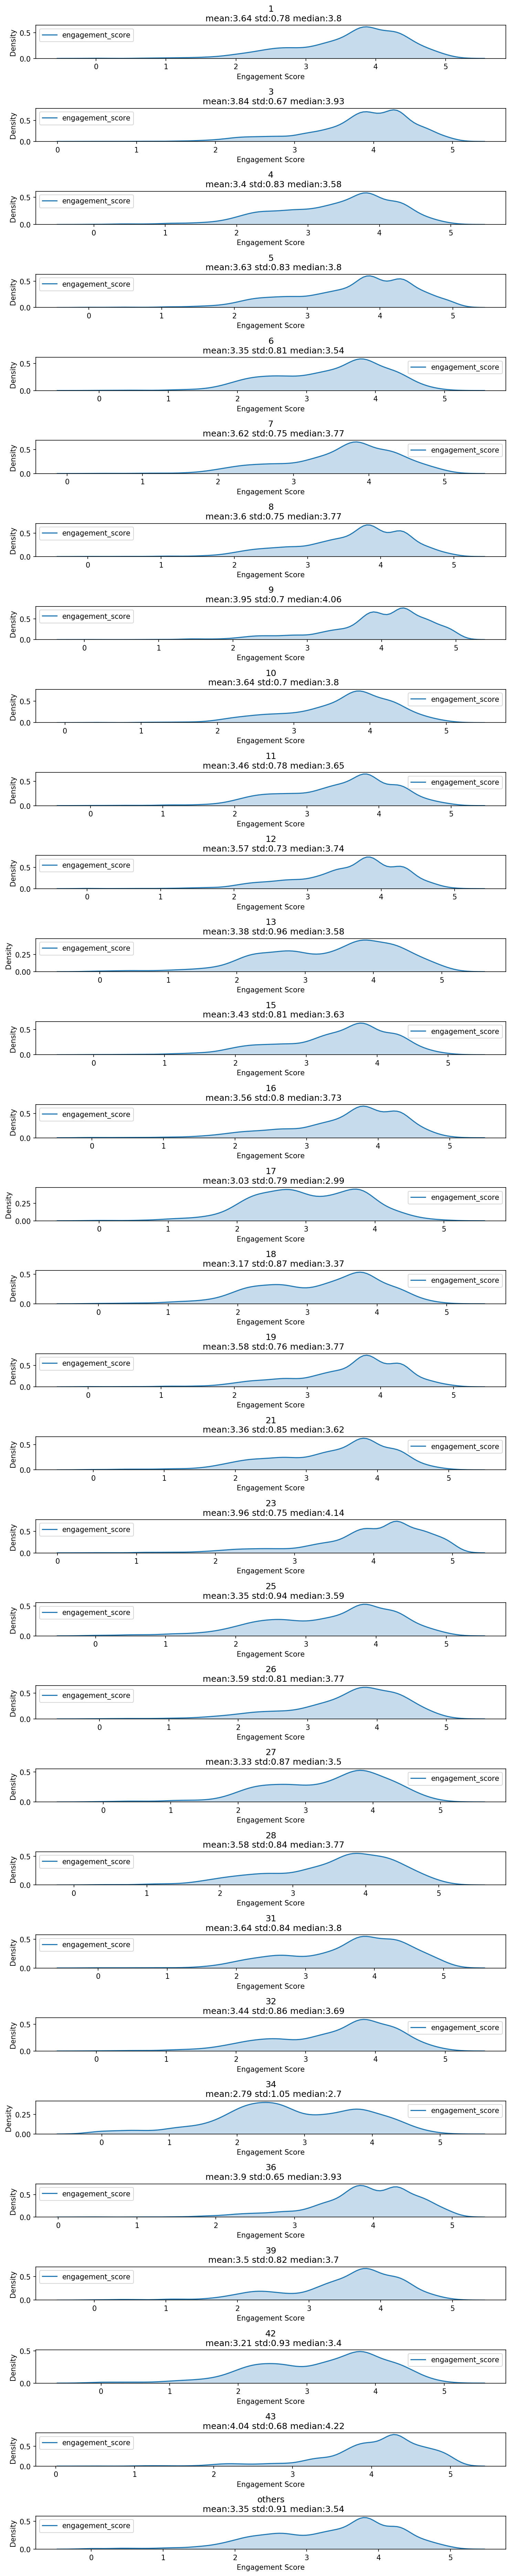

In [200]:
dist_1(data,'category_id')

In [201]:
data['video_id'].nunique()

175

In [202]:
data['video_id'] = data['video_id'].astype('category')

In [203]:
data.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score,age_category
0,others,128,24,Male,Student,180,1000,4.33,adult
1,32,132,14,Female,Student,330,714,1.79,child
2,12,24,19,Male,Student,180,138,4.35,adult
3,23,112,19,Male,Student,220,613,3.77,adult
4,23,112,27,Male,Working Professional,220,613,3.13,adult


In [204]:
data_1 = data.drop(['age','profession'],axis=1)

In [205]:
data_1.head()

,category_id,video_id,gender,followers,views,engagement_score,age_category
0,others,128,Male,180,1000,4.33,adult
1,32,132,Female,330,714,1.79,child
2,12,24,Male,180,138,4.35,adult
3,23,112,Male,220,613,3.77,adult
4,23,112,Male,220,613,3.13,adult


In [206]:
data_1.dtypes

category_id           object
video_id            category
gender                object
followers              int64
views                  int64
engagement_score     float64
age_category        category
dtype: object

In [207]:
data_1 = pd.get_dummies(data_1,drop_first=True)

In [208]:
data_1.head()

,followers,views,engagement_score,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,...,video_id_170,video_id_171,video_id_172,video_id_173,video_id_174,video_id_175,gender_Male,age_category_adult,age_category_mid_age,age_category_senior
0,180,1000,4.33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,330,714,1.79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180,138,4.35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,220,613,3.77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,220,613,3.13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [209]:
x = data_1.drop(['engagement_score'],axis=1)
y = data_1['engagement_score']

In [210]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [211]:
x_scaled = scalar.fit_transform(x)

In [212]:
x = pd.DataFrame(x_scaled,columns=x.columns)

In [213]:
x.head()

,followers,views,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,...,video_id_170,video_id_171,video_id_172,video_id_173,video_id_174,video_id_175,gender_Male,age_category_adult,age_category_mid_age,age_category_senior
0,-1.572002,1.850629,-0.145332,-0.207384,-0.316124,-0.126231,-0.146933,-0.275983,-0.146973,-0.117612,...,-0.029584,-0.029584,-0.041587,-0.029962,-0.028025,-0.022961,0.838051,0.872300,-0.393184,-0.035457
1,1.682203,0.785722,-0.145332,-0.207384,-0.316124,-0.126231,-0.146933,-0.275983,-0.146973,-0.117612,...,-0.029584,-0.029584,-0.041587,-0.029962,-0.028025,-0.022961,-1.193244,-1.146395,-0.393184,-0.035457
2,-1.572002,-1.358987,-0.145332,-0.207384,-0.316124,-0.126231,-0.146933,-0.275983,-0.146973,-0.117612,...,-0.029584,-0.029584,-0.041587,-0.029962,-0.028025,-0.022961,0.838051,0.872300,-0.393184,-0.035457
3,-0.704214,0.409653,-0.145332,-0.207384,-0.316124,-0.126231,-0.146933,-0.275983,-0.146973,-0.117612,...,-0.029584,-0.029584,-0.041587,-0.029962,-0.028025,-0.022961,0.838051,0.872300,-0.393184,-0.035457
4,-0.704214,0.409653,-0.145332,-0.207384,-0.316124,-0.126231,-0.146933,-0.275983,-0.146973,-0.117612,...,-0.029584,-0.029584,-0.041587,-0.029962,-0.028025,-0.022961,0.838051,0.872300,-0.393184,-0.035457


In [214]:
from sklearn.decomposition import PCA

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,random_state=67,test_size=0.2)

In [216]:
pca =PCA().fit(x)

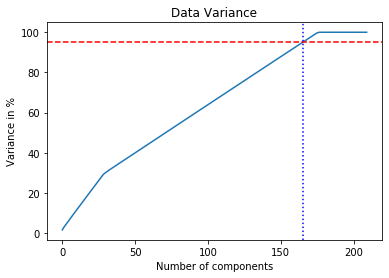

In [217]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Variance in %')
plt.title('Data Variance')
plt.axhline(y=95,color='r',linestyle= '--')
plt.axvline(x=165,color='b',linestyle=':')
plt.show()

In [218]:
pca = PCA(165).fit(x)

In [219]:
x_train = pca.fit_transform(x_train)
x_valid = pca.fit_transform(x_valid)

In [220]:
x_train = pd.DataFrame(x_train)
x_valid = pd.DataFrame(x_valid)

In [221]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,-1.207391,-3.035276,-0.636021,0.265732,0.029347,0.657979,0.710282,0.228644,-0.221397,-0.859034,...,0.041764,0.126888,0.007788,-0.040781,0.086825,-0.004549,0.070659,-0.036285,-0.028826,-0.076835
1,-1.097448,-0.817514,-1.753317,0.014707,-0.491038,2.336813,-1.577449,-3.639066,2.753618,0.818048,...,-0.127516,-0.080935,-0.049219,-0.010238,0.003346,-0.070705,-0.033682,0.007604,-0.198480,-0.006531
2,0.984496,0.120089,-0.178195,-0.037672,0.012325,0.219663,-0.372034,0.111813,-0.383914,-0.091181,...,0.027880,0.067445,0.009414,-0.016506,-0.075368,-0.006153,0.077058,-0.020069,0.026570,0.056112
3,-1.089995,-2.186863,-1.344111,-0.089052,0.108766,-0.015252,-0.048810,0.267125,-0.582109,0.530490,...,0.097571,0.072767,0.042300,-0.066824,0.015804,0.067271,-0.018567,0.017657,0.150401,-0.060996
4,0.666983,2.555841,0.170748,-0.172930,-0.536962,0.065146,-1.966831,-0.099161,-0.331919,-0.249076,...,0.261813,0.241486,0.098073,-0.028476,0.110100,0.145306,0.097774,0.008725,0.345677,-0.085361


In [222]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [223]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
lr.score(x_valid,y_valid)

-0.2050181450857722

In [225]:
from sklearn.model_selection import cross_val_score

In [226]:
cross_val_score(lr,x_train,y_train,cv=5)

array([0.18762426, 0.18461287, 0.18801167, 0.17751014, 0.18142156])

In [227]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5,test_size=0.20,random_state=68)

In [228]:
cross_val_score(lr,x_train,y_train,cv=cv)

array([0.19091112, 0.16948482, 0.18768048, 0.1864029 , 0.17787573])

In [229]:
test_data = pd.read_csv('test_1zqHu22.csv')

In [230]:
test_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [232]:
test_data.drop(['row_id','user_id'],axis=1,inplace=True)

In [233]:
test_data['category_id'] = test_data['category_id'].astype('category')
cat_stat = test_data['category_id'].value_counts()
cat_stats_less_than_1000 = cat_stat[cat_stat<1000]
cat_stats_less_than_1000

11    974
25    961
4     821
16    704
34    682
12    523
31    514
32    425
18    187
42    186
21    185
15    170
1     165
9     159
7     159
13    136
10    104
29     77
46     17
44     12
Name: category_id, dtype: int64